In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_dengue = pd.read_csv('../data/clean/dengue_cases.csv', index_col=0)
df_dengue

,Cases
2009-01-04,67.0
2009-01-11,50.0
2009-01-18,46.0
2009-01-25,67.0
2009-02-01,60.0
...,...
2017-11-26,20.0
2017-12-03,29.0
2017-12-10,29.0
2017-12-17,22.0


In [3]:
df_weather = pd.read_csv('../data/clean/weather_data.csv', header=[0,1], index_col=[0])
df_weather

RAINFALL                    TMAX  TMIN      TMEAN    RH        \
                min    max       mean   max   min       mean   min   max   
date                                                                       
2009-01-04      0.0    1.4   0.475000  31.7  23.6  27.775000  82.0  83.0   
2009-01-11      0.0   35.6  12.142857  33.0  23.5  28.385714  82.0  86.0   
2009-01-18      0.0   54.0  14.357143  30.7  22.3  25.771429  87.0  96.0   
2009-01-25      0.0   19.2   2.742857  33.0  23.7  28.385714  80.0  87.0   
2009-02-01      0.0   24.8   4.028571  33.0  23.3  28.100000  77.0  87.0   
...             ...    ...        ...   ...   ...        ...   ...   ...   
2017-11-26      0.0    9.8   3.257143  33.6  24.2  27.928571  74.0  89.0   
2017-12-03      0.0    0.4   0.057143  34.1  24.2  29.528571  74.0  80.0   
2017-12-10      0.0  109.8  24.342857  35.0  24.4  29.457143  72.0  81.0   
2017-12-17      0.0   31.0  10.142857  34.4  24.0  28.328571  68.0  89.0   
2017-12-24      0.0   39.4   6.128571  34.0  23.6  28.550000  70.0  86.0   

                      WIND SPEED  
                 mean       mean  
date                              
2009-01-04  82.750000   2.250000  
2009-01-11  83.857143   2.000000  
2009-01-18  90.428571   2.714286  
2009-01-25  83.428571   1.571429  
2009-02-01  82.285714   2.285714  
...               ...        ...  
2017-11-26  82.285714   1.714286  
2017-12-03  76.571429   2.142857  
2017-12-10  76.000000   1.857143  
2017-12-17  78.000000   1.285714  
2017-12-24  78.642857   1.857143  

[468 rows x 10 columns]

In [4]:
df_merged = pd.merge(df_dengue, df_weather, left_index=True, right_index=True)
df_merged.columns = ['Cases', 'RAINFALL min', 'RAINFALL max', 'RAINFALL mean', 'TMAX', 'TMIN', 'TMEAN', 'RH min', 'RH max',
                    'RH mean', 'WINDSPEED mean']
df_merged

,Cases,RAINFALL min,RAINFALL max,RAINFALL mean,TMAX,TMIN,TMEAN,RH min,RH max,RH mean,WINDSPEED mean
2009-01-04,67.0,0.0,1.4,0.475000,31.7,23.6,27.775000,82.0,83.0,82.750000,2.250000
2009-01-11,50.0,0.0,35.6,12.142857,33.0,23.5,28.385714,82.0,86.0,83.857143,2.000000
2009-01-18,46.0,0.0,54.0,14.357143,30.7,22.3,25.771429,87.0,96.0,90.428571,2.714286
2009-01-25,67.0,0.0,19.2,2.742857,33.0,23.7,28.385714,80.0,87.0,83.428571,1.571429
2009-02-01,60.0,0.0,24.8,4.028571,33.0,23.3,28.100000,77.0,87.0,82.285714,2.285714
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-26,20.0,0.0,9.8,3.257143,33.6,24.2,27.928571,74.0,89.0,82.285714,1.714286
2017-12-03,29.0,0.0,0.4,0.057143,34.1,24.2,29.528571,74.0,80.0,76.571429,2.142857
2017-12-10,29.0,0.0,109.8,24.342857,35.0,24.4,29.457143,72.0,81.0,76.000000,1.857143
2017-12-17,22.0,0.0,31.0,10.142857,34.4,24.0,28.328571,68.0,89.0,78.000000,1.285714


In [5]:
df_merged.index = pd.to_datetime(df_merged.index)
# df_merged.index = df_merged.index.to_period('W')
df_merged

,Cases,RAINFALL min,RAINFALL max,RAINFALL mean,TMAX,TMIN,TMEAN,RH min,RH max,RH mean,WINDSPEED mean
2009-01-04,67.0,0.0,1.4,0.475000,31.7,23.6,27.775000,82.0,83.0,82.750000,2.250000
2009-01-11,50.0,0.0,35.6,12.142857,33.0,23.5,28.385714,82.0,86.0,83.857143,2.000000
2009-01-18,46.0,0.0,54.0,14.357143,30.7,22.3,25.771429,87.0,96.0,90.428571,2.714286
2009-01-25,67.0,0.0,19.2,2.742857,33.0,23.7,28.385714,80.0,87.0,83.428571,1.571429
2009-02-01,60.0,0.0,24.8,4.028571,33.0,23.3,28.100000,77.0,87.0,82.285714,2.285714
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-26,20.0,0.0,9.8,3.257143,33.6,24.2,27.928571,74.0,89.0,82.285714,1.714286
2017-12-03,29.0,0.0,0.4,0.057143,34.1,24.2,29.528571,74.0,80.0,76.571429,2.142857
2017-12-10,29.0,0.0,109.8,24.342857,35.0,24.4,29.457143,72.0,81.0,76.000000,1.857143
2017-12-17,22.0,0.0,31.0,10.142857,34.4,24.0,28.328571,68.0,89.0,78.000000,1.285714


In [6]:
# drop RH min, RH max, TMAX, RAINFALL max, RAINFALL min when modelling
df_merged = df_merged.drop(['RH min', 'RH max', 'TMAX', 'RAINFALL max', 'RAINFALL min'], axis=1)
df_merged

,Cases,RAINFALL mean,TMIN,TMEAN,RH mean,WINDSPEED mean
2009-01-04,67.0,0.475000,23.6,27.775000,82.750000,2.250000
2009-01-11,50.0,12.142857,23.5,28.385714,83.857143,2.000000
2009-01-18,46.0,14.357143,22.3,25.771429,90.428571,2.714286
2009-01-25,67.0,2.742857,23.7,28.385714,83.428571,1.571429
2009-02-01,60.0,4.028571,23.3,28.100000,82.285714,2.285714
...,...,...,...,...,...,...
2017-11-26,20.0,3.257143,24.2,27.928571,82.285714,1.714286
2017-12-03,29.0,0.057143,24.2,29.528571,76.571429,2.142857
2017-12-10,29.0,24.342857,24.4,29.457143,76.000000,1.857143
2017-12-17,22.0,10.142857,24.0,28.328571,78.000000,1.285714


# Baseline test - ARIMA on Cases only
- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

### Check Stationarity of Cases using adfuller

In [7]:
from statsmodels.tsa.stattools import coint, adfuller

def check_for_stationarity(X, cutoff=0.01):
    pvalue = adfuller(X)[1]
    print(adfuller(X)[0])
    print(adfuller(X)[4])
    if pvalue < cutoff:
        print(f'p-value = {str(pvalue)} The series {X.name} is likely stationary.')
    else:
        print(f'p-value = {str(pvalue)} The series {X.name} is likely not stationary.')

In [8]:
check_for_stationarity(df_merged['Cases'])

-5.204945710860609
{'1%': -3.44455286264131, '5%': -2.8678027030003483, '10%': -2.5701057817594894}
p-value = 8.589960084412457e-06 The series Cases is likely stationary.


<AxesSubplot:>

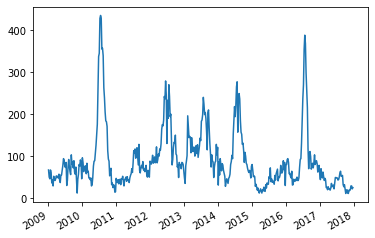

In [9]:
df_merged['Cases'].plot()

## Cases is stationary by adfuller, but by eye test there is seasonality and does not seem stationary

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_cf(X, lag):
    plt.subplots(figsize=(10,8))
    ax1 = plt.subplot(211)
#     acf = plot_acf(X.interpolate().diff()[1:], lags=lag, ax=ax1)
    acf = plot_acf(X[1:], lags=lag, ax=ax1)
    ax1.legend([X.name])
    
    ax2 = plt.subplot(212)
#     pacf = plot_pacf(X.interpolate().diff()[1:], lags=lag, ax=ax2)
    pacf = plot_pacf(X[1:], lags=lag, ax=ax2)
    ax2.legend([X.name])

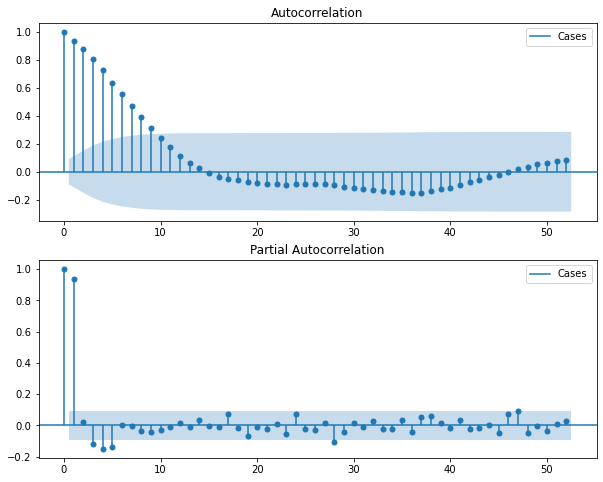

In [11]:
plot_cf(df_merged['Cases'], 52)

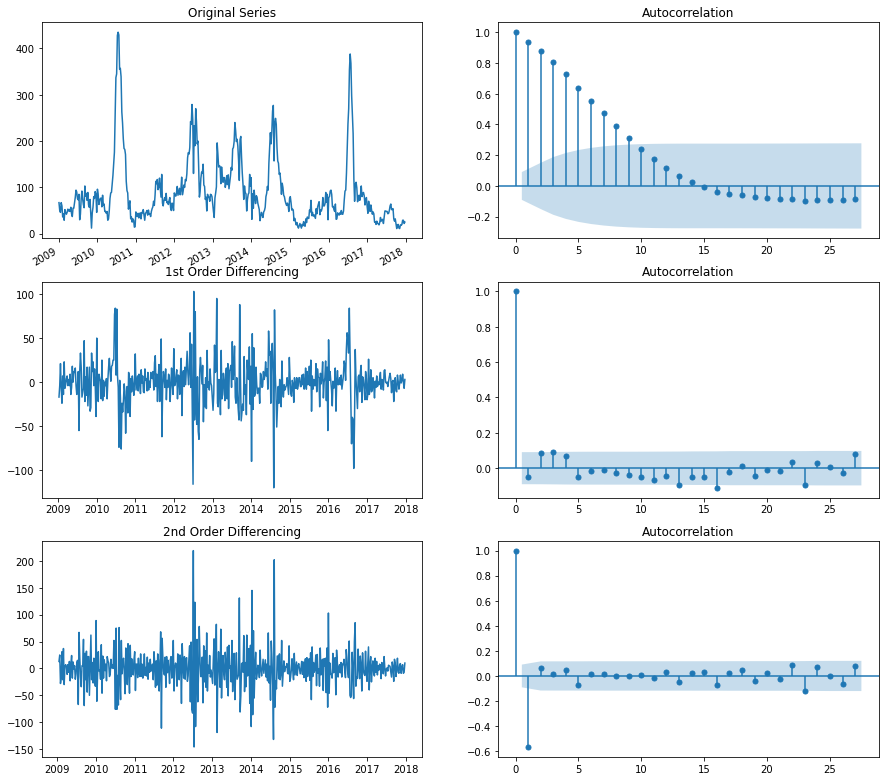

In [12]:
# Original Series
fig, axes = plt.subplots(3, 2, figsize=(15,15))
df_merged['Cases'].plot(ax=axes[0,0]); axes[0, 0].set_title('Original Series')
plot_acf(df_merged['Cases'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_merged['Cases'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_merged['Cases'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_merged['Cases'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_merged['Cases'].diff().diff().dropna(), ax=axes[2, 1]);

### ACF for 2nd Order very high negative, 2nd order diff is over differentiated
## Try using 1st order diff

<AxesSubplot:>

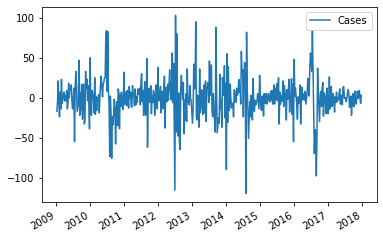

In [13]:
df_diff = pd.DataFrame(df_merged['Cases'].diff().dropna())
df_diff.columns = ['Cases']
df_diff.plot()

In [14]:
check_for_stationarity(df_diff['Cases'])

-8.852063357616048
{'1%': -3.44455286264131, '5%': -2.8678027030003483, '10%': -2.5701057817594894}
p-value = 1.5632487310981842e-14 The series Cases is likely stationary.


## Diff1 seems stationary, try using d=1

### Autocorrelation plot

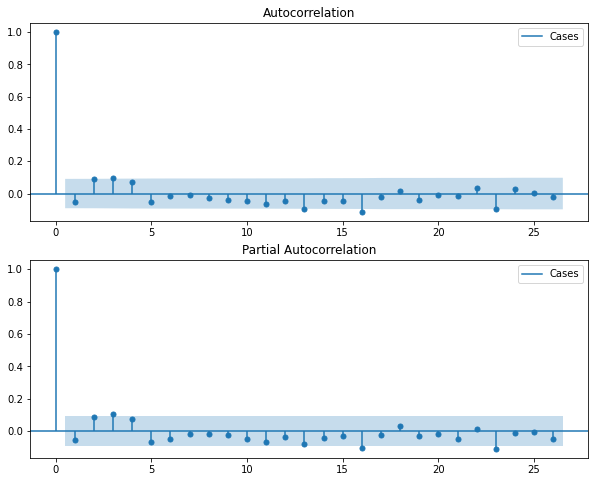

In [15]:
plot_cf(df_diff['Cases'], 26)

In [59]:
from sklearn import preprocessing
from collections import Counter

def scale_data(train, test):
    cols_to_scale = list((Counter(train.columns.to_list()) - Counter(['Cases'])).elements())
#     scaler = preprocessing.StandardScaler()
    scaler = preprocessing.MinMaxScaler()
    train[cols_to_scale] = scaler.fit_transform(train[cols_to_scale])
    test[cols_to_scale] = scaler.transform(test[cols_to_scale])

    return train, test

In [49]:
Xt = df_merged
size = int(len(Xt) * 0.66)
ttrain, ttest = Xt[0:size], Xt[size:len(X)]
ttrain, ttest = ttrain[['Cases', 'TMIN', 'TMEAN']], ttest[['Cases', 'TMIN', 'TMEAN']]

In [60]:
scaled_train, scaled_test = scale_data(ttrain, ttest)

In [61]:
scaled_train

,Cases,TMIN,TMEAN
2009-01-04,67.0,0.52,0.457122
2009-01-11,50.0,0.50,0.581395
2009-01-18,46.0,0.26,0.049419
2009-01-25,67.0,0.54,0.581395
2009-02-01,60.0,0.46,0.523256
...,...,...,...
2014-11-02,83.0,0.60,0.636628
2014-11-09,80.0,0.54,0.645349
2014-11-16,71.0,0.58,0.691860
2014-11-23,65.0,0.70,0.796512


### Lags 3, 13, 16, 23 seem most relevant for both ACF and PACF

### Try p = 3, and q =3

In [16]:
# split into train and test sets
X = df_merged['Cases']
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

## Rolling Forecast ARIMA - 1 week ahead using intuitive parameters

100%|██████████████████████████████| 160/160 [01:13<00:00,  2.17it/s]

Test RMSE: 20.630


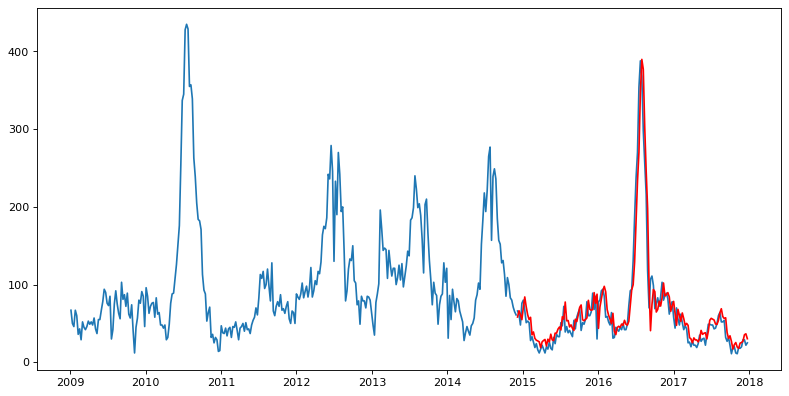

In [17]:
# from tqdm import tqdm
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error

# warnings.filterwarnings("ignore")

# history = [x for x in train]
# predictions = list()

# # walk-forward validation
# for t in tqdm(range(len(test))):
#     model = ARIMA(history, order=(3,0,3))
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test[t]
#     history.append(obs)
# #     print('predicted=%f, expected=%f' % (yhat, obs))
# # evaluate forecasts
# pred = pd.DataFrame(predictions, index=test.index)
# rmse = np.sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# plt.figure(figsize=(12, 6), dpi=80)
# plt.plot(train, color='C0')
# plt.plot(test, color='C0')
# plt.plot(pred, color='red')
# plt.show();

# Grid Search of ARIMA

In [34]:
from math import sqrt
from multiprocessing import cpu_count
from itertools import repeat
from multiprocessing import Process, Manager, Pool
from warnings import catch_warnings
from warnings import filterwarnings
import traceback
import workers
import istarmap


# grid search configs
def grid_search(cfg_list, n_step=1, parallel=True):
    manager = Manager()
    scores = manager.list()
    print('starting grid search')
    if __name__ == '__main__':
        try:
            with Pool(cpu_count()-1) as pool:
                it = zip(repeat([train, test]), repeat(scores), cfg_list, repeat(n_step))
                for _ in tqdm(pool.istarmap(workers.score_model, list(it)), total=len(list(it))):
                    pass
        except Exception as e:
            raise e
    # remove empty results
    scores = list([r for r in scores if r[1] != None])
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

# plot predicted of best model
def plot_modelz(predicted):
    plt.figure(figsize=(12, 6), dpi=80)
    plt.plot(pd.concat([train, test]), color='C0')
    plt.plot(predicted, color='red')
    plt.show()

# create a set of sarima configs to try
def arima_configs():
    models = list()
    # define config lists
    p_params = [0, 1, 2, 3]
    d_params = [0, 1]
    q_params = [0, 1, 2, 3]
#     t_params = ['n','c']
    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                    cfg = [(p,d,q)]
                    models.append(cfg)
    return models

In [19]:
## test function
tmp = grid_search([[(0, 0, 0)], [(0, 0, 0)]])

0it [00:00, ?it/s]

starting grid search


2it [00:12,  6.38s/it]


0it [00:00, ?it/s]

starting grid search


32it [04:47,  8.99s/it]


done
[(1, 0, 3)] 31.036296623339823
[(1, 0, 0)] 31.377830675335346
[(3, 0, 0)] 31.40841720572334


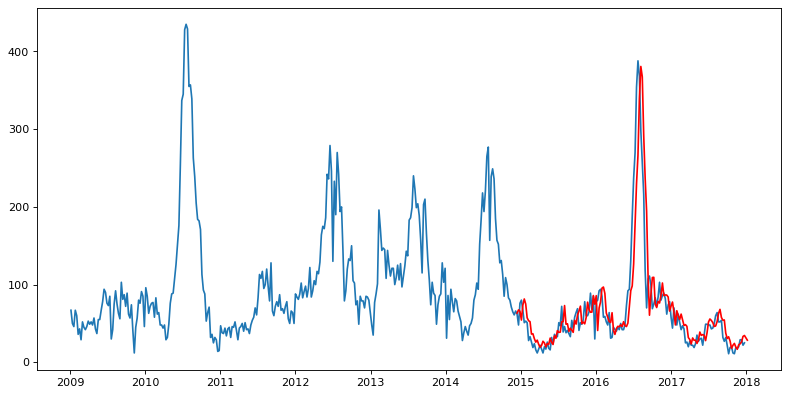

In [22]:
# model configs
cfg_list = arima_configs()

# 1 week forecast
n_step = 1
# grid search
scores = grid_search(cfg_list, n_step)
print('done')
# list top 3 configs
for cfg, error, p in scores[:3]:
    print(cfg, error)
plot_modelz(scores[0][2])

0it [00:00, ?it/s]

starting grid search


32it [04:54,  9.19s/it]


done
[(1, 0, 3)] 56.02651805468894
[(3, 0, 0)] 56.508972646446274
[(1, 0, 2)] 56.722229305021195


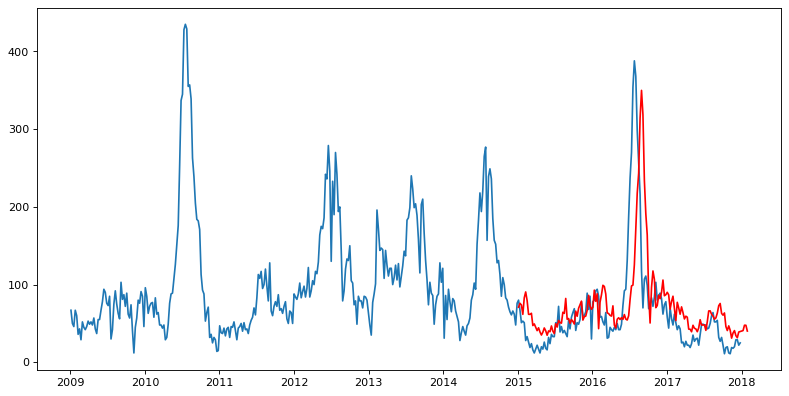

In [23]:
## 4 week forecast
n_step = 4
# grid search
scores = grid_search(cfg_list, n_step)
print('done')
# list top 3 configs
for cfg, error, p in scores[:3]:
    print(cfg, error)
plot_modelz(scores[0][2])

0it [00:00, ?it/s]

starting grid search


32it [04:47,  9.00s/it]


done
[(1, 0, 0)] 72.68145886383068
[(1, 0, 3)] 72.70490814211776
[(3, 0, 0)] 72.94062963556097


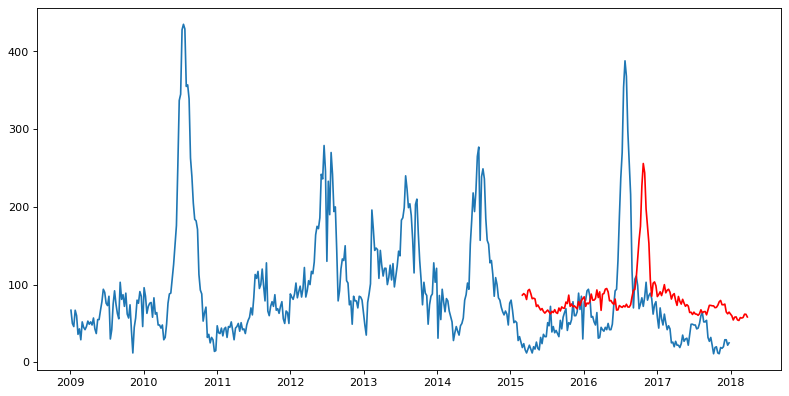

In [24]:
## 12 week forecast
n_step = 12
# grid search
scores = grid_search(cfg_list, n_step)
print('done')
# list top 3 configs
for cfg, error, p in scores[:3]:
    print(cfg, error)
plot_modelz(scores[0][2])

In [25]:
scores[0][2][-15:]

,0
2017-12-10,64.789364
2017-12-17,62.364566
2017-12-24,64.576583
2018-01-07,59.782621
2018-01-14,54.476138
2018-01-21,58.099433
2018-01-28,58.432017
2018-02-04,54.505322
2018-02-11,53.838007
2018-02-18,57.531744
